In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# tweets = pd.read_csv('sarcasm_dataset_cleaned.csv')
tweets  = pd.read_json("sarcasm_detection_shared_task_twitter_training.jsonl", lines=True)
tweets = tweets.rename(columns={'response':'tweet'})
tweets['tweet'] = tweets['tweet'].str.replace('@USER', '')
tweets = tweets.replace({'label': {'SARCASM': 1, 'NOT_SARCASM': 0}})

sarcastic_tweets = tweets.loc[tweets['label']==1]
nonsarcastic_tweets = tweets.loc[tweets['label']==0]

In [30]:
import textstat

sarcastic_tweets['sentences'] = sarcastic_tweets['tweet'].apply(textstat.sentence_count)
nonsarcastic_tweets['sentences'] = nonsarcastic_tweets['tweet'].apply(textstat.sentence_count)
tweets['sentences'] = tweets['tweet'].apply(textstat.sentence_count)

C:\Users\Eric\AppData\Local\Temp\ipykernel_14124\3439353181.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sarcastic_tweets['sentences'] = sarcastic_tweets['tweet'].apply(textstat.sentence_count)
C:\Users\Eric\AppData\Local\Temp\ipykernel_14124\3439353181.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonsarcastic_tweets['sentences'] = nonsarcastic_tweets['tweet'].apply(textstat.sentence_count)


In [39]:
nonsarcastic_tweets['sentences'].min()

1

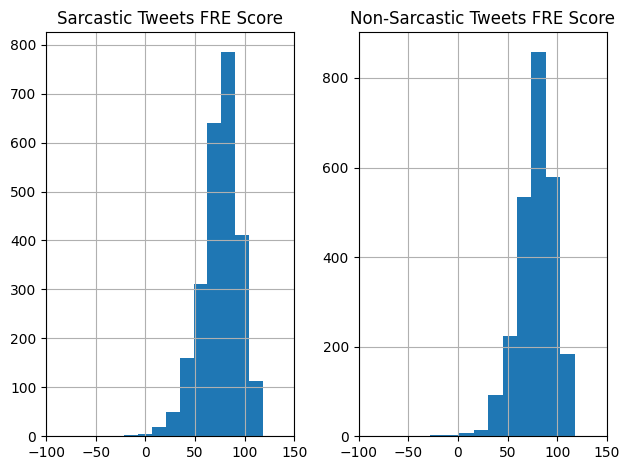

In [9]:
from textstat import flesch_reading_ease

fig, axes = plt.subplots(1,2)
sarcastic_tweets['tweet'].apply(lambda x: flesch_reading_ease(x)).hist(ax=axes[0])
axes[0].set_title('Sarcastic Tweets FRE Score')
axes[0].set_xlim(-100,150)
nonsarcastic_tweets['tweet'].apply(lambda x: flesch_reading_ease(x)).hist(ax=axes[1])
axes[1].set_title('Non-Sarcastic Tweets FRE Score')
axes[1].set_xlim(-100,150)

plt.tight_layout()

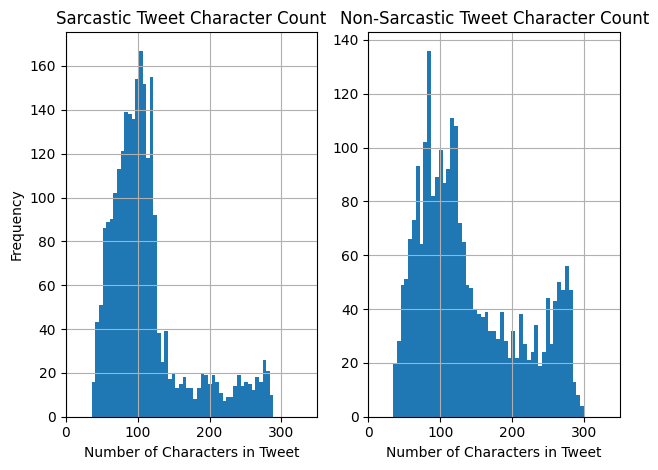

In [10]:
fig, axes = plt.subplots(1,2)

sarcastic_tweets['tweet'].str.len().hist(bins=50, ax=axes[0])
axes[0].set_title('Sarcastic Tweet Character Count')
# axes[0].title.set_size(10)
axes[0].set_xlabel('Number of Characters in Tweet')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(0, 350)
nonsarcastic_tweets['tweet'].str.len().hist(bins=50, ax=axes[1])
axes[1].set_title('Non-Sarcastic Tweet Character Count')
# axes[1].title.set_size(10)
axes[1].set_xlabel('Number of Characters in Tweet')
axes[1].set_xlim(0, 350)

plt.tight_layout()

In [11]:
print(sarcastic_tweets.shape, nonsarcastic_tweets.shape)

(2500, 3) (2500, 3)


(0.0, 80.0)

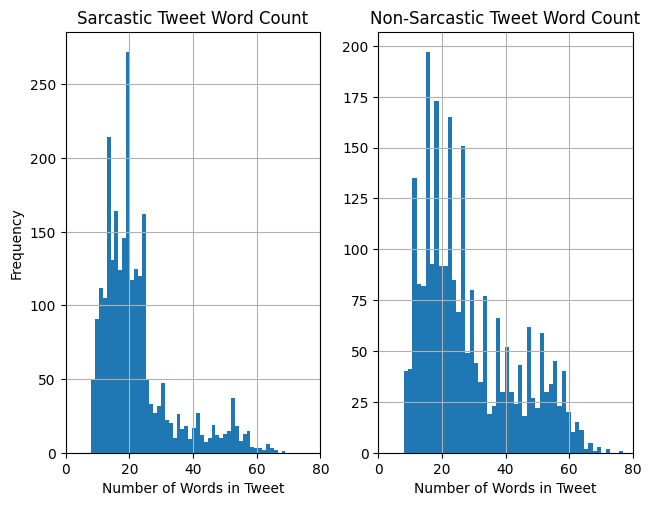

In [12]:
fig, axes = plt.subplots(1,2)
plt.tight_layout()
sarcastic_tweets['tweet'].str.split().map(lambda x: len(x)).hist(bins=50, ax=axes[0])
axes[0].set_title('Sarcastic Tweet Word Count')
# axes[0].title.set_size(10)
axes[0].set_xlabel('Number of Words in Tweet')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(0, 80)
nonsarcastic_tweets['tweet'].str.split().map(lambda x: len(x)).hist(bins=50, ax=axes[1])
axes[1].set_title('Non-Sarcastic Tweet Word Count')
# axes[1].title.set_size(10)
axes[1].set_xlabel('Number of Words in Tweet')
axes[1].set_xlim(0, 80)